In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/Social_Network_Ads (1).csv')
dataset=data
dataset
#Split data into features and target
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

#Train test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#Apply standard scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#Train the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

#Predict value on test set
y_pred=classifier.predict(X_test)


#Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

#Find accuracy
from sklearn import metrics
prediction=metrics.accuracy_score(y_test,y_pred)
print("Accuracy",prediction*100,'%')



[[62  6]
 [ 3 29]]
Accuracy 91.0 %


[Text(0.4967948717948718, 0.9615384615384616, 'x[0] <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(0.26282051282051283, 0.8846153846153846, 'x[1] <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(0.11538461538461539, 0.8076923076923077, 'x[0] <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(0.08974358974358974, 0.7307692307692307, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.14102564102564102, 0.7307692307692307, 'x[1] <= -0.06\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(0.11538461538461539, 0.6538461538461539, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.16666666666666666, 0.6538461538461539, 'x[1] <= 0.403\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(0.14102564102564102, 0.5769230769230769, 'x[1] <= 0.027\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(0.11538461538461539, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.5, 'x[1] <=

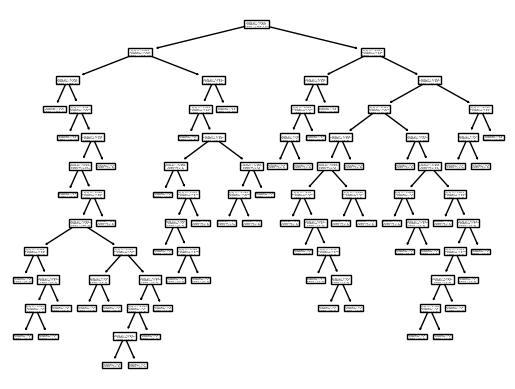

In [19]:
from sklearn import tree
from matplotlib.colors import ListedColormap
tree.plot_tree(classifier)


<ipython-input-20-d57bc914c1b3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


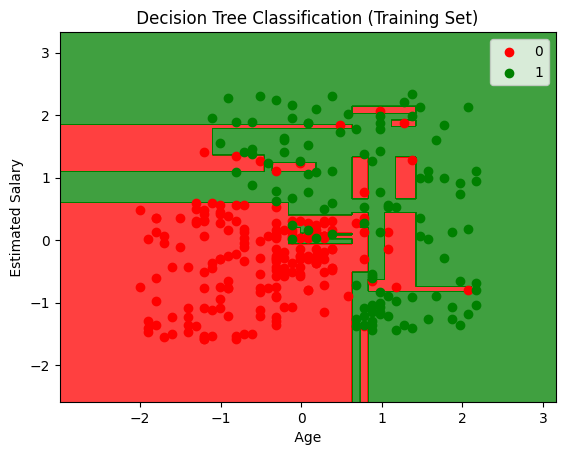

In [20]:
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

plt.title(" Decision Tree Classification (Training Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

<ipython-input-23-bb8cbe60c3c5>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


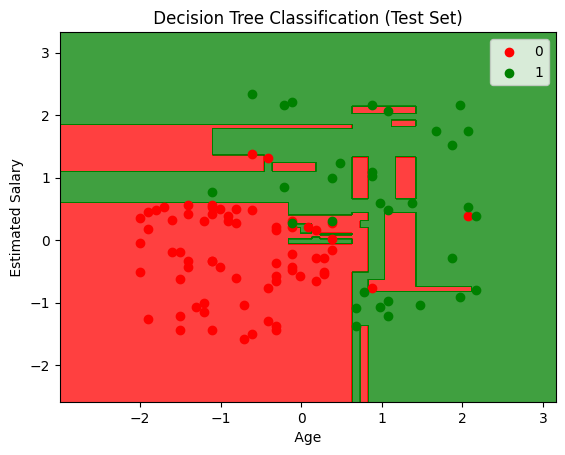

In [23]:
from sklearn import tree
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

plt.title(" Decision Tree Classification (Test Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

In [24]:

#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param_grid={"max_depth":[2,5,6,7,10,15],
            "min_samples_split":[10,20,50,60,40,25],
            "min_samples_leaf":[10,20,30,35,12,18],
            "max_features":["sqrt","log2"],
            "criterion":["gini","entropy"]}
grid_search=GridSearchCV(dt,param_grid=param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train,y_train)
best_param=grid_search.best_params_


In [25]:
#Train best decision tree
best_dt=DecisionTreeClassifier(**best_param)
best_dt.fit(X_train,y_train)
y_pred=best_dt.predict(X_test)

#Find accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score*100,"%")

Accuracy: 94.0 %


<ipython-input-27-f323c91646a5>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


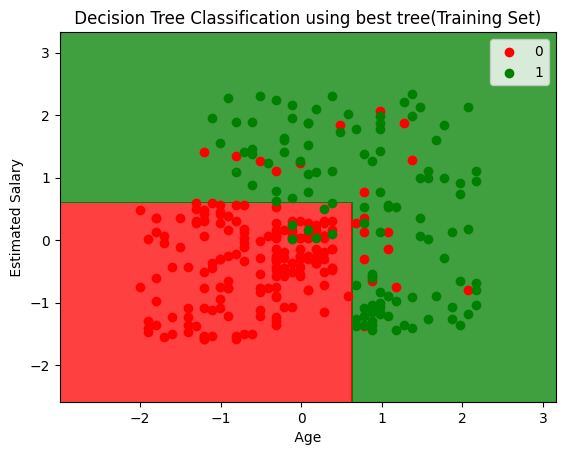

In [27]:
from sklearn import tree
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,best_dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

plt.title(" Decision Tree Classification using best tree(Training Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

<ipython-input-29-7437cc8248a4>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],


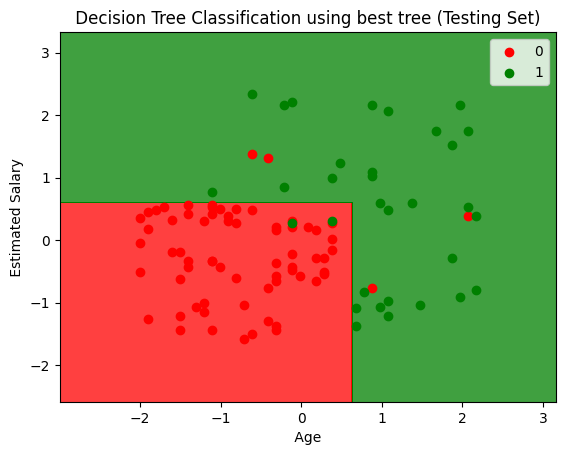

In [29]:
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,best_dt.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
     c=ListedColormap(('red','green'))(i),label=j)
plt.title(" Decision Tree Classification using best tree (Testing Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()



